***
# E-Commerce Customer Churn Prediction
by : Ocky Daniel Naibaho
***


### **Contents**

1. Business Problem Understanding
1. Data Understanding
1. Data Cleaning
1. Data Analysis
1. Data Preprocessing & Feature Engineering
1. Modeling & Evaluation
1. Explainable Model
1. Conclusion & Recommendation





***
## 1. Business Problem Understanding
***

**1.1 Context**  

E-Commerce merupakan salah satu bentuk perkembangan teknologi dalam bidang ekonomi yang meliputi proses promosi, pembelian dan pemasaran produk melalui media elektronik atau internet. Di tengah perkembangan arus teknologi dan informasi digital yang semakin canggih. Aktivitas E-Commerce adalah suatu penerapan dari E-Business atau bisnis elektronik yang cukup efektif, sehingga platform eCommerce semakin banyak dan persaingan semakin ketat.Sebuah perusahaan eCommerce menjalankan sebuah bisnis online retail dengan model B2C (Business to Consumer) dengan produk-produk yang ditawarkan seperti Laptop & Accesories, Mobile Phone, Fashion, Groceries, dan lainnya.
Aktivitas bisnis Ecommerce tidak terlepas dari pelanggan itu sendiri. Profitabilitas perusahaan dipengaruhi oleh banyak hal, tetapi tidak ada yang lebih penting daripada retensi pelanggan. Kemampuan untuk mengembangkan dan mempertahankan basis pelanggan yang setia adalah tujuan utama bagi setiap perusahaan, dan metode pembelajaran yang membantu Anda mengurangi dan mencegah customer *churn* bisa sangat berharga [Accurate.id](https://accurate.id/marketing-manajemen/customer-*churn*/).

Customer *churn* adalah adalah kecenderungan pelanggan untuk meninggalkan penyedia layanan, atau beralihnya pelanggan dari satu penyedia layanan ke yang lainnya [Yulianti, 2016](http://repositori.unsil.ac.id/2513/4/BAB%20II.pdf).


**1.2 Problem Statement :**

Industri Ecommerce menghadapi permasalahan serius terkait dengan churn pelanggan, di mana pelanggan memutuskan untuk berhenti menggunakan layanan perusahaan. Retensi pelanggan merupakan faktor penting dalam kelangsungan bisnis untuk bersaing dengan kompetitor. Sebuah riset mengatakan peningkatan retensi pelanggan 5% saja dapat meningkatkan 25% laba [(Fred Reichheld)](https://media.bain.com/Images/BB_Prescription_cutting_costs.pdf), dan pelanggan loyal menghabiskan 67% lebih pada bulan 31-36 dibanding bulan 0-6 [(Fred Reichheld)](https://media.bain.com/Images/Value_online_customer_loyalty_you_capture.pdf).Churn pelanggan juga erat kaitannya dengan cost yang ditanggung oleh perusahaan, dilansir dari [Amy Gallo, 2014](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) memperoleh pelanggan baru (Customer Acquisition Cost/CAC) membutuhkan biaya lebih besar 5 kali lipat dibandingkan dengan mempertahankan pelanggan loyal (Customer Retention Cost/CRC).

Bagaimana kita dapat mengantisipasi dan mencegah churn pelanggan di industri telekomunikasi? Pernyataan masalah ini mencakup beberapa pertanyaan utama:

* Identifikasi Faktor-faktor Penyebab Churn:
Apa saja faktor-faktor yang secara signifikan berkontribusi terhadap keputusan pelanggan untuk berhenti menggunakan layanan?
* Pengembangan Model Prediktif:
Bagaimana kita dapat membangun model prediktif yang dapat mengidentifikasi pelanggan yang berpotensi untuk churn?
* Strategi Retensi yang Efektif:
Apa rekomendasi strategi retensi yang dapat diterapkan untuk mempertahankan pelanggan yang berisiko churn?


**1.3 Project Stakeholders:**

Pihak stakeholders yang terlibat dan yang akan menggunakan model dari analisis ini adalah:
* ***Sales & Marketing Team***: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
* ***Operations Team***: Tim ini akan bertanggung jawab dalam mengkoordinasikan serta mengurus rincian operasi, mengevaluasi gambaran besar operasi, dan memastikan bahwa area bisnis berjalan semulus dan seefektif mungkin.
* ***Finance Team***: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

Ketiga peran diatas memiliki tujuan yang sama yaitu memaksimalkan pendapatan perusahaan dengan tepat


**1.4 Goals :**

Tujuan utama dari proyek ini adalah membangun model prediktif yang dapat dengan akurat memprediksi churn pelanggan dengan menganalisis data historis pelanggan. Diharapkan implikasi dari pembangunan dan penggunaan model ini berikutnya dapat mengurangi potensi kerugian yang diakibatkan strategi yang kurang efektif, menerapkan strategi preventif kepada pelanggan loyal dan berpotensi *Churn* dan menerapkan strategi lainnya yang diperlukan untuk mengembalikkan pelanggan yang telah *Churn* .


**1.5 Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang churn dan yang tidak.Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan yang churn dan tidak dengan berdasarkan riwayat data sebelumnya.


**1.6 Metric Evaluation:**

![Metric](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*2DiXJjAmOA7LtbkpBGODkg.png)

- **True Positive (TP)**: Customer diprediksi *churn* dan kenyataannya *churn*
- **False Positive (FP)**: Customer diprediksi *churn*, namun pada kenyataannya customer tidak *churn*
- **False Negative (FN)**: Customer diprediksi tidak *churn*, namun pada kenyataannya customer *churn*
- **True Negative (TN)**: Customer diprediksi tidak *churn* dan kenyataannya tidak *churn*

Type 1 error : False Positive  
Konsekuensi: Usaha berupa biaya, waktu dan sumber daya yang sia-sia.

Type 2 error : False Negative  
Konsekuensi: kehilangan pelanggan loyal

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi potensi kehilangan pelanggan loyal, tetapi tanpa membuat cost marketing dari perusahaan yang sia-sia,. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc, karena jika diperhatikan dataset yang dimiliki memiliki imbalanced data.

In [2]:
# Library

# Basic Libraries
import pandas as pd
import numpy as np

# Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib.patches as mpatches
from IPython.display import display

# Feature engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
!pip install category_encoders
import category_encoders as ce

# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve

# Imbalanced dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Shap
!pip install shap
import shap

# Ignore warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)


# Saving Model
import pickle



     - 17.8 MB 22.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=31b1fd59b2cca154c2bee3eb808584068b3bd9c634d52d1879ac89769761e7ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-suufzd3a/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ef0392f51ae541725d96a5a988943ccbde0733d2b3883fd3f2e25e28fcab8982
  Stored in directory

<ipython-input-2-a6e25970a5aa>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.4 MB/s eta 0:00:00


In [3]:
# Import dataset
df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')

***
## 2. Data Understanding
***

### 2.1 Dataset Information

In [4]:
# Datatype dan Menghitung jumlah dari kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


### 2.2 Attribute Information

In [5]:
df.describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  3747.000000      3772.000000               3941.000000   
mean     10.081398        15.650583                  3.679269   
std       8.498864         8.452301                  1.013938   
min       0.000000         5.000000                  1.000000   
25%       2.000000         9.000000                  3.000000   
50%       9.000000        14.000000                  4.000000   
75%      16.000000        21.000000                  4.000000   
max      61.000000       127.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  DaySinceLastOrder  \
count        3941.000000      3941.000000  3941.000000        3728.000000   
mean            3.088302         4.237757     0.282416           4.531652   
std             1.381832         2.626699     0.450232           3.667648   
min             1.000000         1.000000     0.000000           0.000000   
25%             2.000000         2.000000     0.000000           2.000000   
50%             3.000000         3.000000     0.000000           3.000000   
75%             4.000000         6.000000     1.000000           7.000000   
max             5.000000        22.000000     1.000000          46.000000   

       CashbackAmount        Churn  
count     3941.000000  3941.000000  
mean       176.707419     0.171023  
std         48.791784     0.376576  
min          0.000000     0.000000  
25%        145.700000     0.000000  
50%        163.340000     0.000000  
75%        195.250000     0.000000  
max        324.990000     1.000000



| Attribute | Description |
| --- | --- |
| Tenure | Masa tenure pelanggan (bulan) |
| Warehouse to Home | Jarak antara warehouse ke rumah pelanggan (mil) |
| Number of Device | Jumlah perangkat yang terdaftar (unit) |
| Prefered Order Cat | Kategori yang disukai pelanggan bulan lalu |
| Satisfaction Score | Skor kepuasan pelanggan terhadap service |
| Marital | Status pernikahan pelanggan |
| Number of Address | Jumlah alamat yang terdaftar  |
| Complain | 0 - Tidak Ada complain, 1 - ada complain|
| Day Since Last Order | Hari sejak pemesanan terakhir (hari) |
| Cashback Amount | Rata-rata cashback bulan lalu ($)|
| Churn	 | 0 - Tidak churn , 1 - Churn |


Dari data diatas dapat diketahui beberapa hal:

* Terdapat 3941 baris dan 11 kolom pada dataset
* Data numerik dengan variabel quantitave antara lain 'Tenure', 'Warehouse to Home', 'Number of Device', 'Number of Address', 'Day Since Last Order', dan 'Cashback Amount'. Data numerik yang menunjukkan yes or no atau bersifat qualitative adalah complain, dan churn. Data numerik yang menunjukkan qualitative dengan scale ordinal adalah satisfaction score. Data kategorik ada dua antara lain 'Prefered Order Cat' dan 'Marital'.



***
## 3. Data Cleaning
***

Pada tahap ini kita akan membersihkan data yang dianggap tidak relevan untuk kebutuhan membangun model. Sebelum melakukan data cleaning mari kita lihat nilai unik masing-asing fitur/variabel

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0                     Tenure  float64   194     4.92      36   
1            WarehouseToHome  float64   169     4.29      33   
2   NumberOfDeviceRegistered    int64     0     0.00       6   
3           PreferedOrderCat   object     0     0.00       6   
4          SatisfactionScore    int64     0     0.00       5   
5              MaritalStatus   object     0     0.00       3   
6            NumberOfAddress    int64     0     0.00      14   
7                   Complain    int64     0     0.00       2   
8          DaySinceLastOrder  float64   213     5.40      22   
9             CashbackAmount  float64     0     0.00    2335   
10                     Churn    int64     0     0.00       2   

                                         uniqueSample  
0   [15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,...  
1   [29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0...  
2                                  [4, 3, 6, 2, 5, 1]  
3   [Laptop & Accessory, Mobile, Fashion, Others, ...  
4                                     [3, 1, 4, 2, 5]  
5                         [Single, Married, Divorced]  
6     [2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]  
7                                              [0, 1]  
8   [7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,...  
9   [143.32, 129.29, 168.54, 230.27, 322.17, 152.8...  
10                                             [0, 1]

In [7]:
df.head(10)

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   
5     7.0             16.0                         4        Mobile Phone   
6     1.0             15.0                         6        Mobile Phone   
7     1.0             11.0                         4        Mobile Phone   
8    11.0             12.0                         4        Mobile Phone   
9    17.0              7.0                         3  Laptop & Accessory   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   
5                  2      Divorced                2         0   
6                  5      Divorced                3         0   
7                  5        Single                3         0   
8                  3       Married                2         0   
9                  1       Married                5         1   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2                7.0          168.54      0  
3                NaN          230.27      0  
4                8.0          322.17      0  
5               11.0          152.81      0  
6                2.0          149.51      0  
7                1.0          154.73      1  
8                4.0          137.02      0  
9                2.0          157.43      0

Dapat kita lihat pada variabel 'Prefered Order' terdapat dua kategori yang sebenarnya sama yaitu 'Mobile' dan 'Mobile Phone' hal tersebut mungkin diakibatkan kesalahan pengetikan berikut nya akan ditangani.


Untuk proses data cleaning kita akan menggunakan dataset yang telah diduplikasi terlebih dahulu untuk menghindari perubahan yang tidak diinginkan pada data original selama proses data cleaning.

In [8]:
df_model = df.copy()

### 3.1 Handling Inconsistent Data

In [9]:
# Menghitung Jumlah per Kategori
df_model['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [10]:
# Mengubah Mobile menjadi Mobile Phone
df_model['PreferedOrderCat'] = df_model['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df_model['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

### 3.2 Handling Duplicates

In [11]:
# Melihat Jumlah Data Duplikat
Duplikat = df_model.duplicated().sum()
PersentaseDup = round((df_model.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')


Data duplikat : 672, Persentase Data Duplikat: 17.05


Dikarenakan dataset tidak memiliki variabel unik seperti ('Customer ID') sebagai identifikasi nilai uniknya maka baris tersebut dianggap data duplikat dan berikutnya akan kita hapus karena akan mempengaruhi model machine-learning yang akan dibangun [(Referensi)](https://deepchecks.com/what-is-data-cleaning/).

In [12]:
# Menghapus data duplikat
df_model.drop_duplicates(inplace=True)
print(f'shape data: {df_model.shape}, cek data duplikat: {df_model.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### 3.3 Handling Missing Values

In [13]:
df_model.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [14]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df_model.isnull().sum().sum()}
Jumlah baris dengan missing value: {df_model[df_model.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df_model.isnull().sum().sum()/df_model.shape[0]*100,2)}%''')

Jumlah missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Berikutnya mari kita lihat korelasi dari variabel missing values dengan variabel lainnya menggunakan library missingno.

[(Referensi)] :

(https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009),

(https://github.com/ResidentMario/missingno)

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

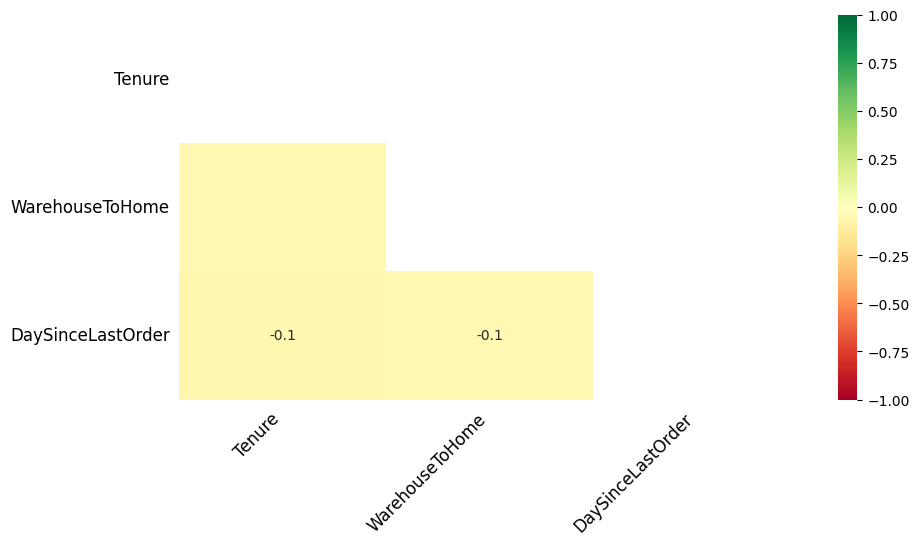

In [15]:
missingno.heatmap(df_model, cmap="RdYlGn", figsize=(10,5), fontsize=12);

Pada heatmap diatas dapat kita lihat bahwa antara variabel yang memiliki missing values saling berkorelasi lemah.

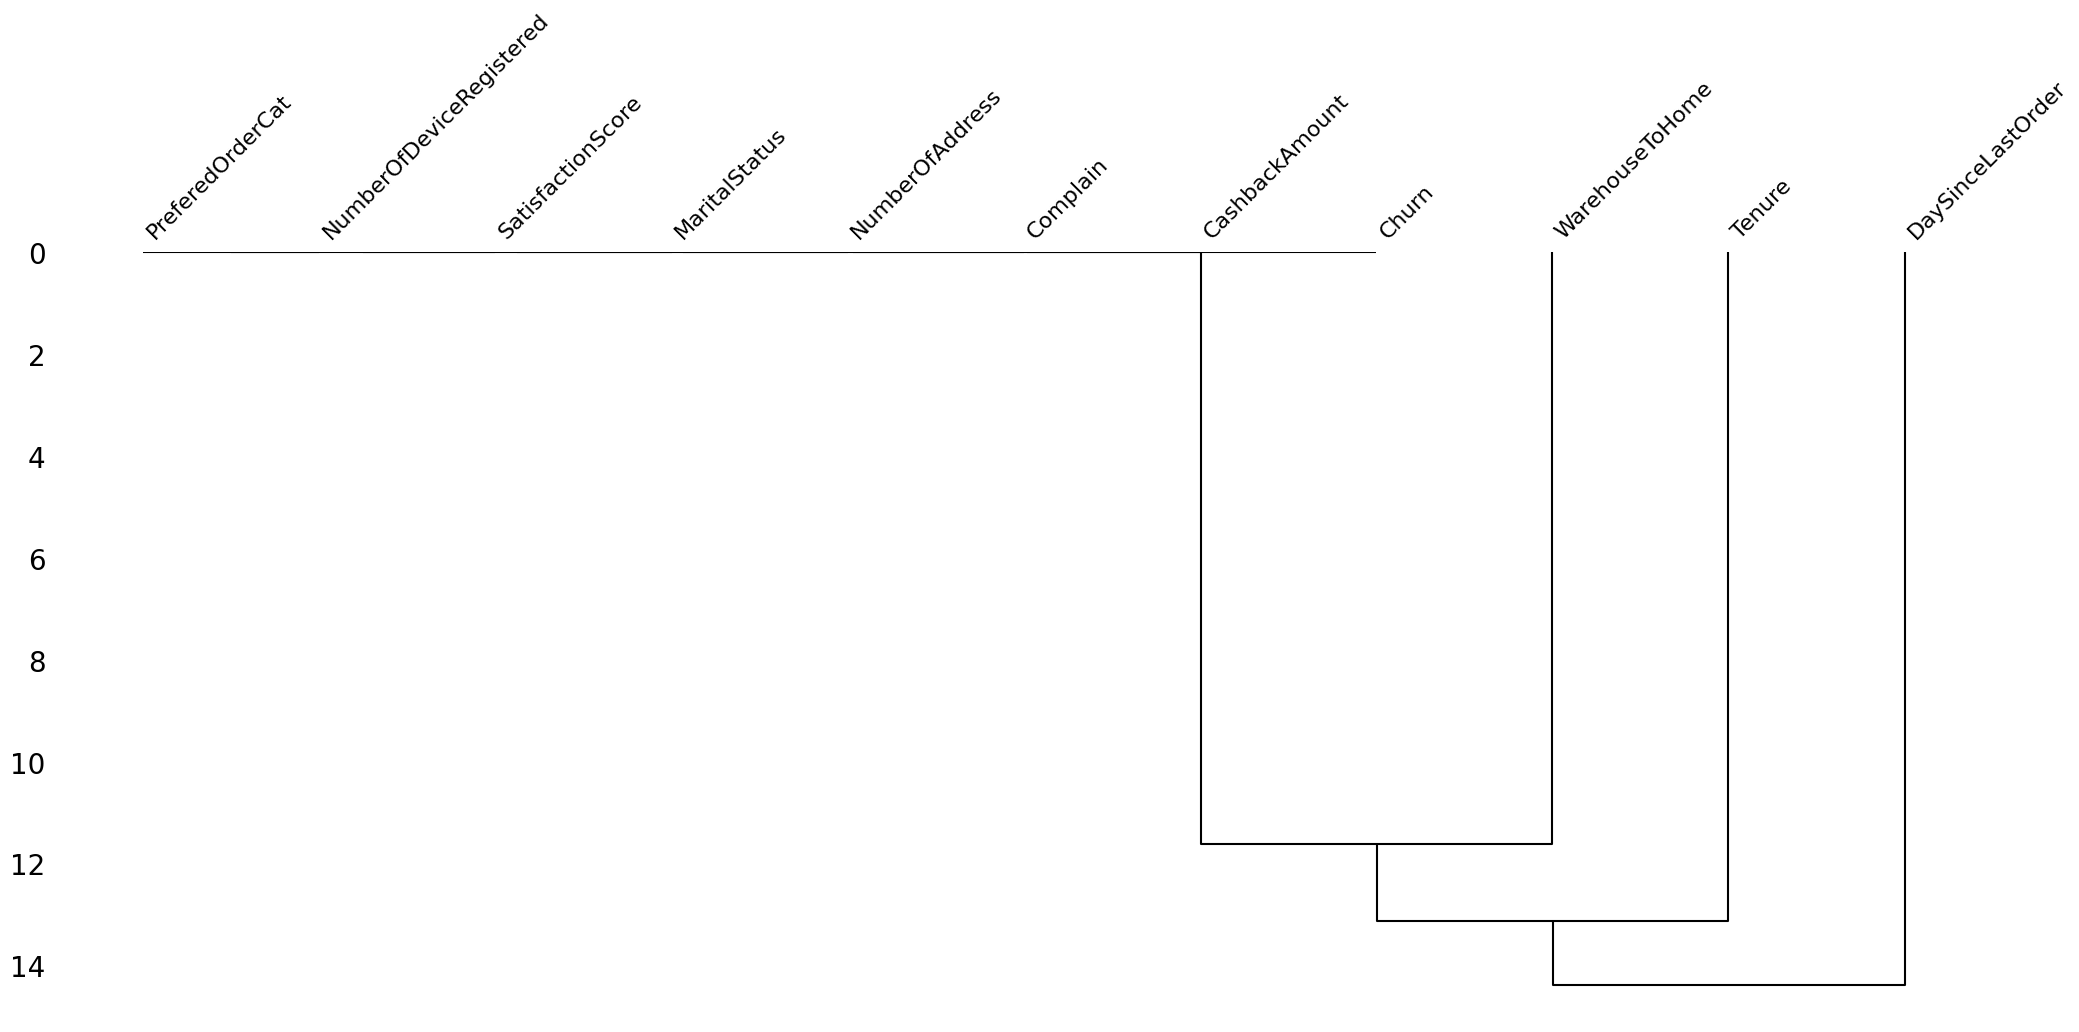

In [16]:
missingno.dendrogram(df_model)
plt.show()

Pada dendogram missing values variabel `'PreferedOrderCat','NumberOfDeviceRegistered','SatisfactionScore', 'MaritalStatus','NumberOfAddress','Complain','CashbackAmount',dan 'Churn'` berada di titik 0 dikarenakan tidak memiliki missing values. Dendogram diatas juga menunjukkan ketiga variabel yang memiliki missing values berhubungan dengan variabel 'CashbackAmount' oleh karena mari kita lihat lebih lanjut.

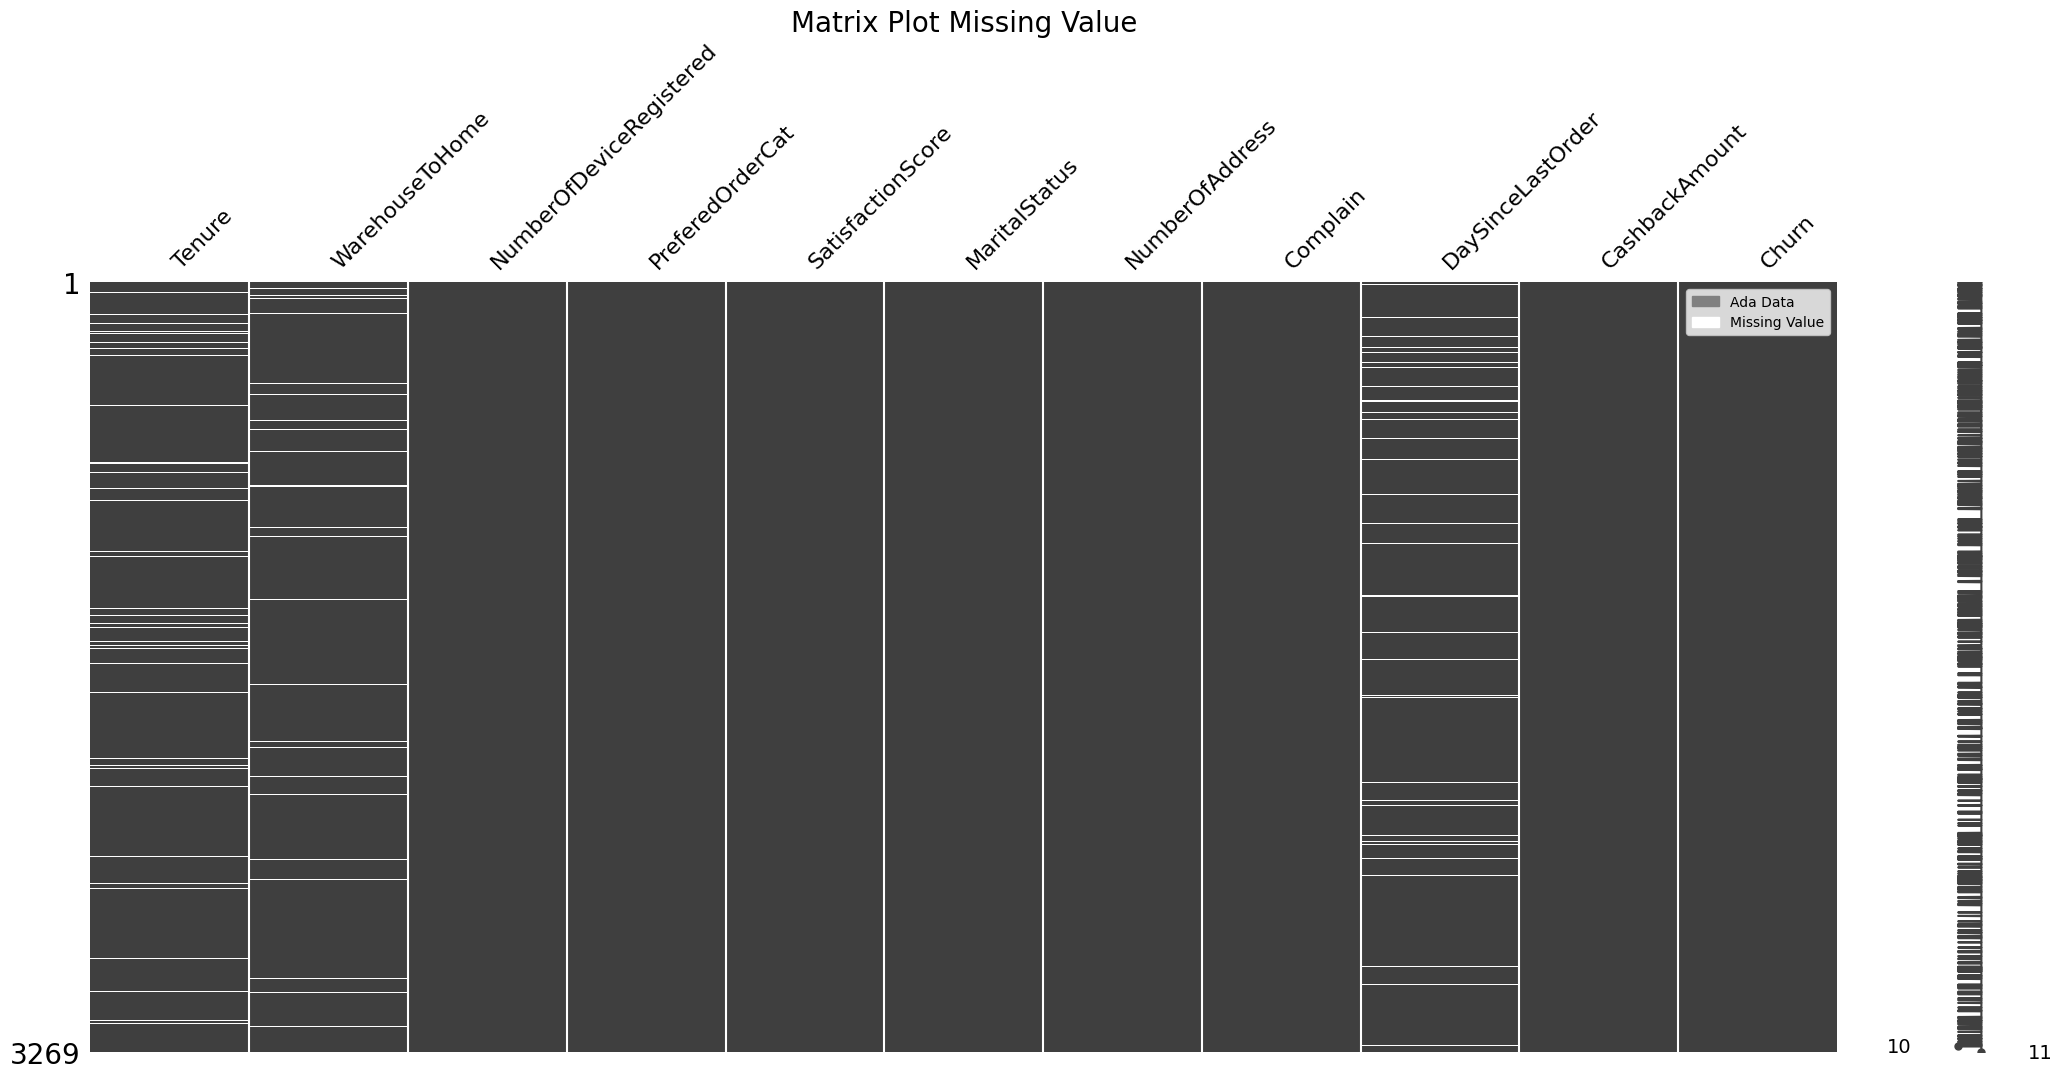

In [17]:
# Melihat missing value dengan matrix plot
missingno.matrix(df_model)
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()

Berdasarkan dendogram diatas berikutnya mari kita menindak-lanjuti dengan mencoba melihat polanya dengan cara mengurutkan berdasarkan 'CashbackAmount'

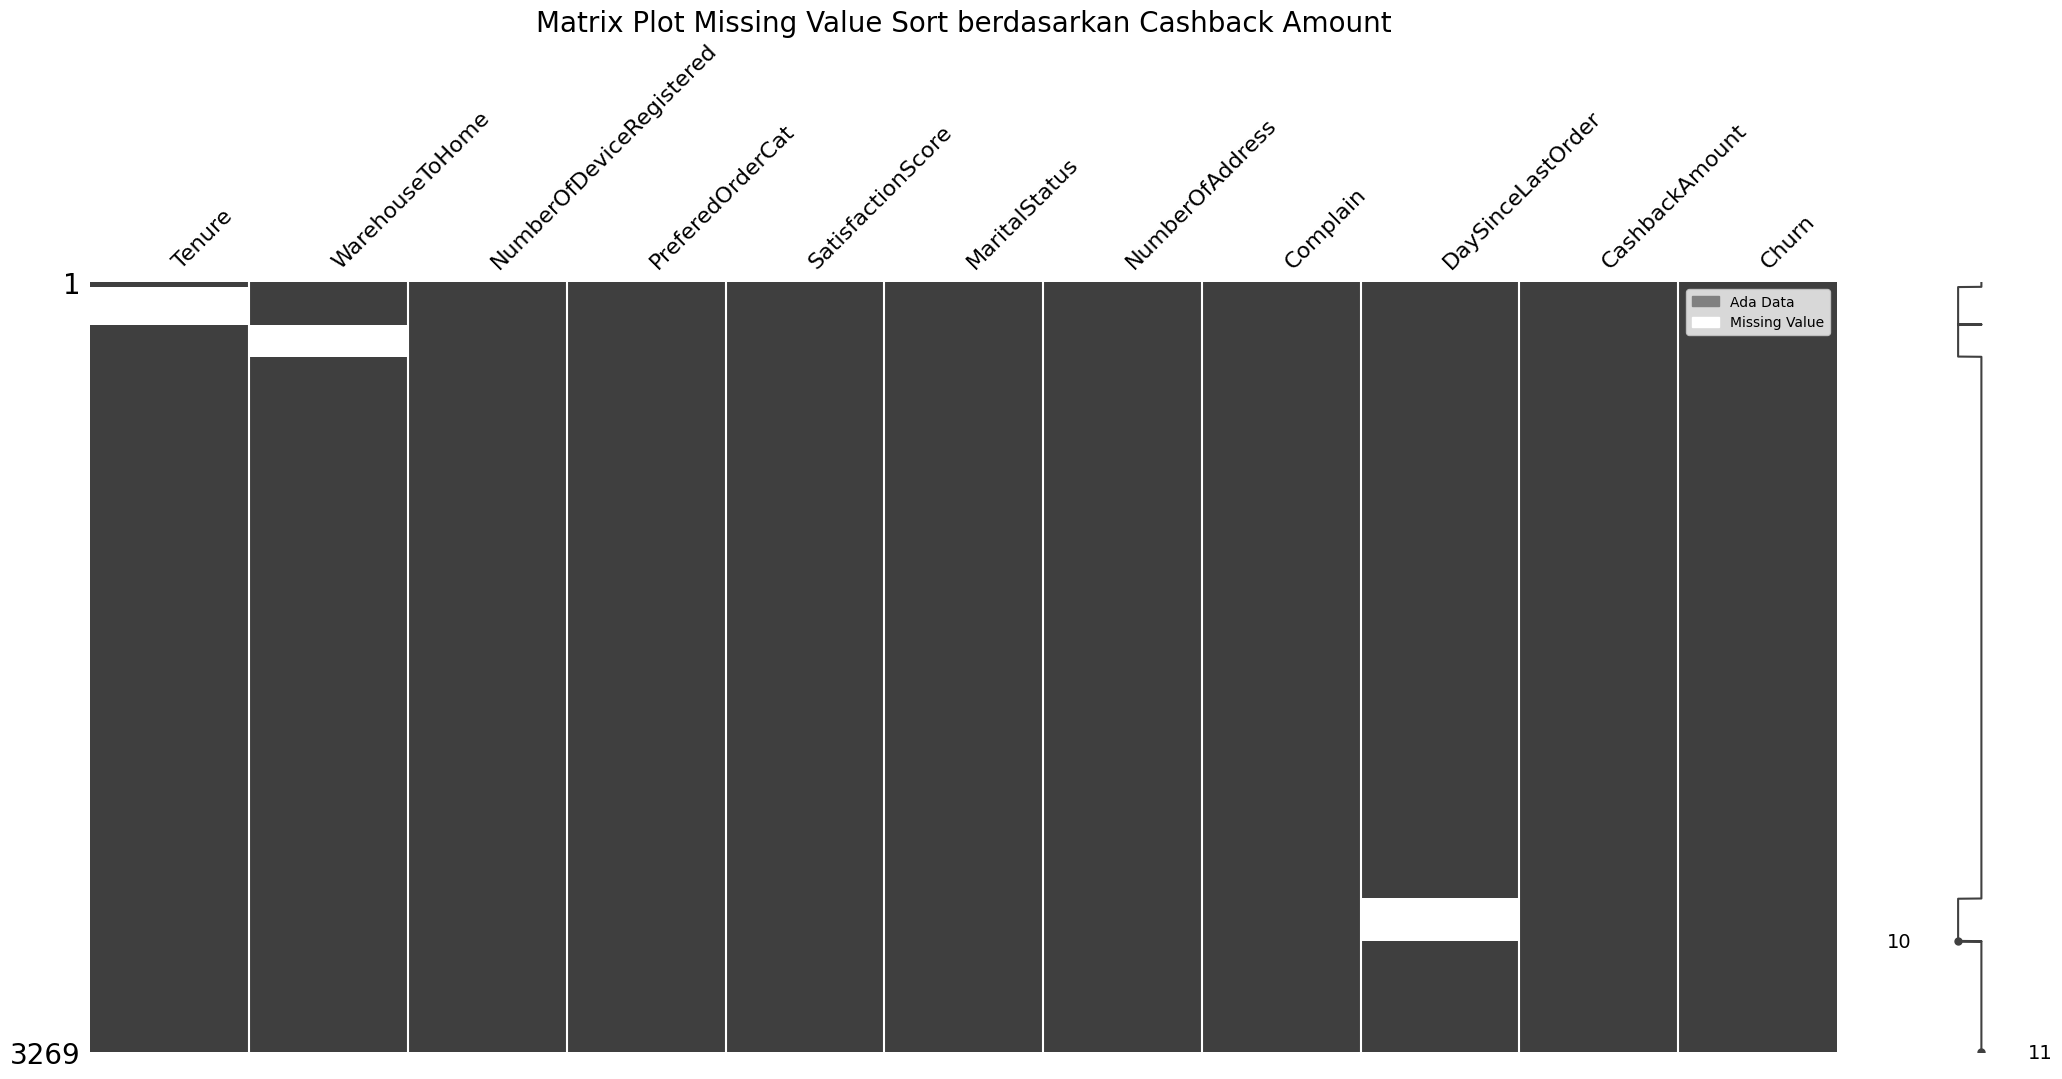

In [18]:
# Matrix missingness berdasarkan Cashback Amount score
missingno.matrix(df_model.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

Dari pendekatan dendogram dan matrix plot diatas, dapat dilihat bahwa variabel missing values memiliki hubungan dengan variabel `CashbackAmount`. Hal ini menunjukkan data `Missing at Random (MAR)` atau terdapat hubungan sistematis antara variabel yang hilang dan variabel lain, tetapi tidak pada variabel yang memiliki missing value itu sendiri.  Missing Value diidentifikasi sebagai MAR [(Referensi)](https://towardsdev.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9).

Berikutnya metode yang bisa digunakan adalah menggunakan Iterative Imputation karena data berupa multivariate atau dipengaruhi oleh variabel lain. Selain itu handling missing value tidak menggunakan median karena banyaknya data missing yang diubah menjadi median akan menghasilkan total data yang bias dan bisa mempengaruhi model proses ini akan dilanjutkan pada Data Preprocessing. ([Pemilihan Metode](https://towardsdatascience.com/a-better-way-to-handle-missing-values-in-your-dataset-using-iterativeimputer-9e6e84857d98#8303)) Sebelum itu akan dilakukan percobaan untuk melihat perbedaan distribusi kolom sebelum dan sesudah dilakukan imputasi pada kolom Tenure, WarehouseToHome, dan DaySinceLastOrder. Hasil yang diharapkan adalah perbedaan distribusi kolom sebelum dan sesudah imputasi tidak terlalu berbeda.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

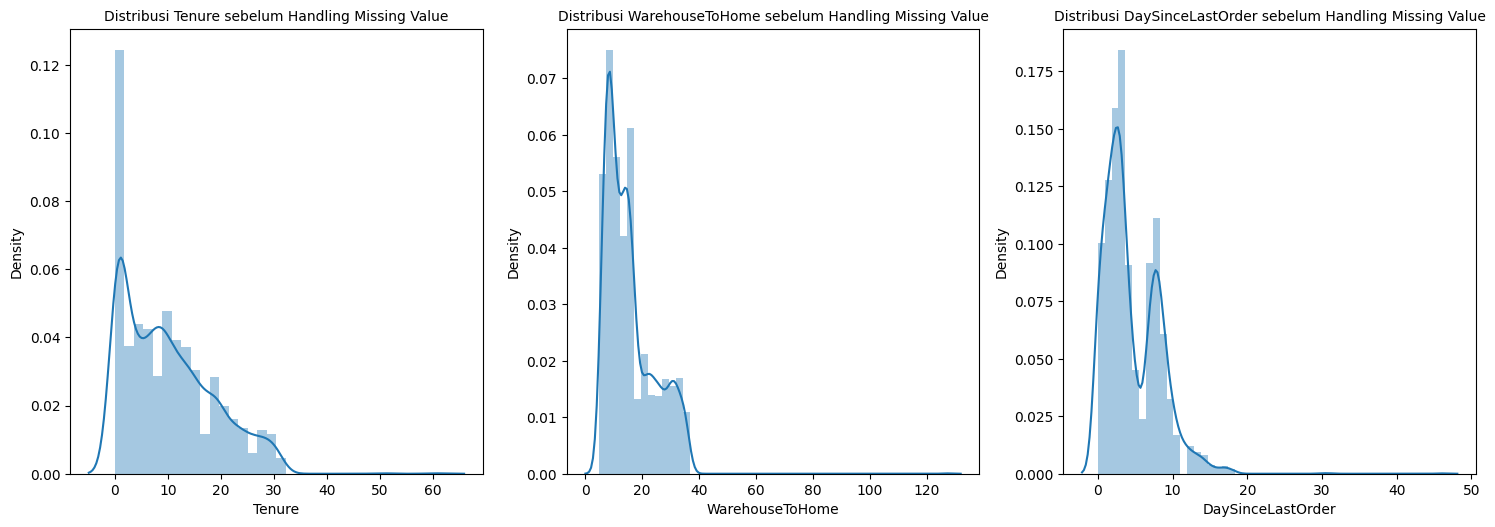

In [19]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]])
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

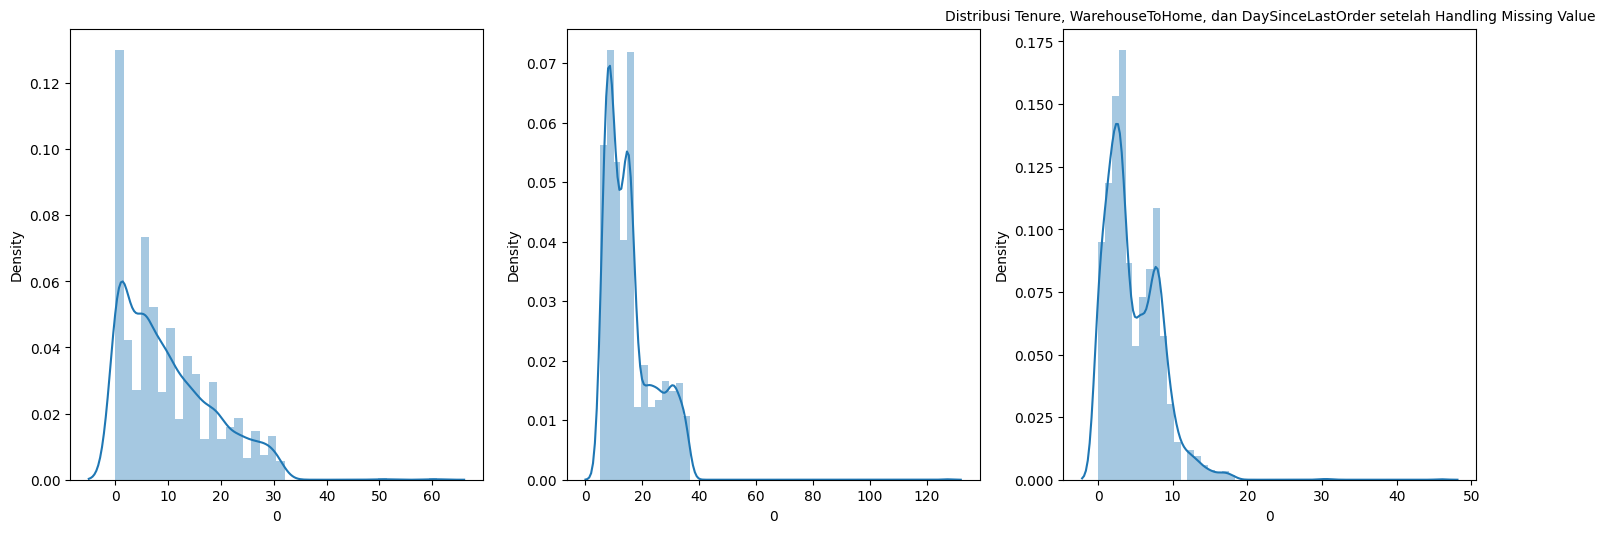

In [20]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=42)
TenureAft = pd.DataFrame(imputer.fit_transform(df_model[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df_model[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df_model[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0])
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

### 3.4 Handling Outliers

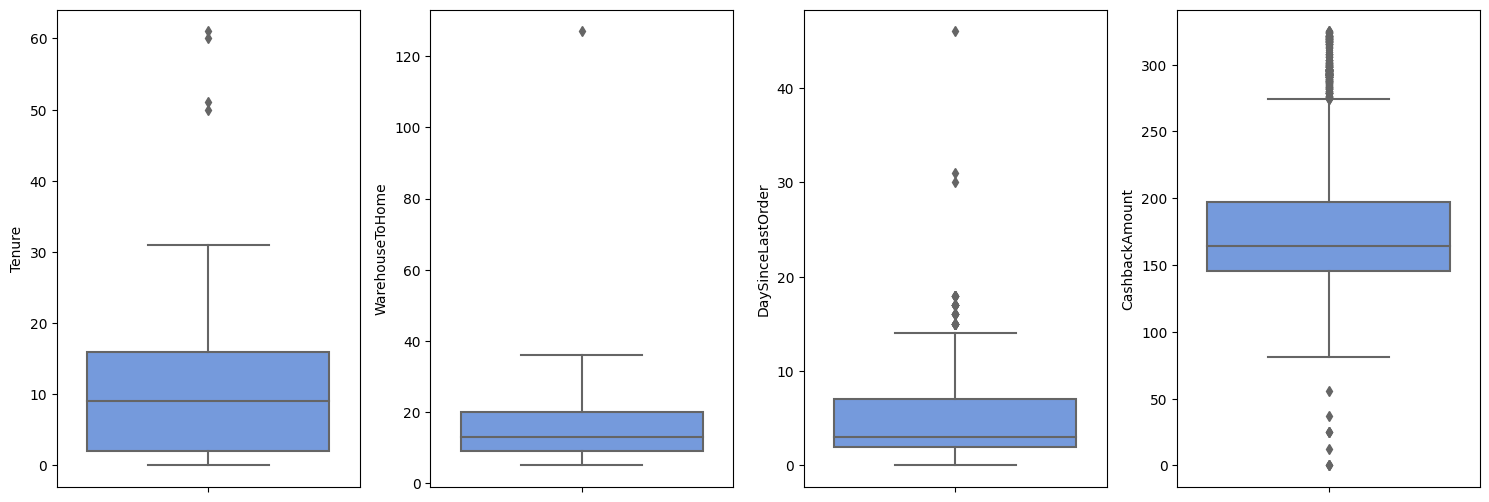

In [21]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df_model[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

In [22]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = df_model[features[i]].quantile(0.25)
    Q3 = df_model[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df_model[features[i]]< lower_bound) | (df_model[features[i]]> upper_bound)
    outlier = df_model.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df_model[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.3%
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Dari perhitungan diatas, data outlier pada kolom `Tenure` dan `WarehouseToHome` akan di drop karena memiliki persentase yang kecil. Sedangkan pada `DaySinceLastOrder` dan `CashbackAmount` diabaikan karena dianggap sebagai nilai yang wajar apabila memiliki nilai dengan variansi tinggi.

In [23]:
# Menghapus kolom dengan outlier
df_model.drop(df_model[df_model['Tenure']>37].index,inplace=True)
df_model.drop(df_model[df_model['WarehouseToHome']>36.5].index,inplace=True)

In [24]:
df_model.shape

(3264, 11)

***
## 4.Data Analysis
***

Untuk Data analysis kita akan menggunakan pandas profile report.

In [25]:
profile = ProfileReport(df_model,title='ECommerce Profile Report', html={'style':{'full_width':True}})

In [26]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*

Dari profile report yang berhasil di generate beberapa hal yang dapat kita highlight adalah:
1. Pada tab overview setelah kita melakukan data cleaning
* Dataset menjadi 3264 baris dan 11 kolom.
* Variabel 'CashbackAmount' berkorelasi tinggi dengan 'PreferedOrderCat'.
* Beberapa variabel memiliki missing values yaitu:
'Tenure' memiliki 160 (4.9%) missing values
'WarehouseToHome' memiliki 135 (4.1%) missing values
'DaySinceLastOrder' memiliki 181 (5.5%) missing values, missing values ini berikutnya akan kita lakukan imputasi dengan metode `Iterative Imputer` pada `Data Preprocessing and Feature Engineering`.
* Kemudian nilai '0' pada variabel 'Tenure' dan 'DaySinceLastOrder' merupakan rentang waktu sehingga berikutnya akan diabaikan.
2. Pada tab variabel:
* Kita bisa melihat proporsi pelanggan yang churn dan tidak churn pada variabel target kita kelasnya tidak seimbang(Imbalance). Oleh karena itu penanganan yang kita akan lakukan adalah resampling.

***
## 5. Data Preprocessing and Feature Engineering
***

Untuk 'Data Preprocessing and Feature Engineering' kita akan lakukan dengan beberapa tahapan antara lain:
* Data Splitting menjadi train data dan test data.
* Melakukan handling missing value dengan IterativeImputer pada kolom `Tenure`, `WarehouseToHome`, `DaySinceLastOrder` sesuai dengan analisa yang dilakukan pada data cleaning.
* Melakukan OneHotEncoding pada kolom `MaritalStatus` karena memiliki kategori sedikit(3) dan tidak ada susunan tertentu.
* Melakukan BinaryEncoding pada kolom `PreferedOrderCat` karena memiliki kategori yang cukup banyak yaitu 5 jenis yang berbeda, dan tidak ada susunan tertentu.

### 5.1 Data Splitting

* Menentukan fitur target dan membagi data test dan data training.

In [27]:
# Membuat fitur x dan target y
x = df_model.drop(columns=['Churn'])
y = df_model['Churn']

In [28]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

### 5.2 Handling Missing Value

* Melanjutkan handling missing values berdasarkan data cleaning sebelumnya kita akan menggunakan simple imputer untuk mengisi missing values pada data training dan data test yang telah bagi.

In [29]:
def imputation(x_train, x_test, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(x_train[cont_features])
    x_train[cont_features] = imputerCont.transform(x_train[cont_features])
    x_test[cont_features] = imputerCont.transform(x_test[cont_features])
    return x_train, x_test

In [30]:
# Fit&transform missing value imputation
varcon= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
x_train , x_test = imputation(x_train, x_test,varcon)

### 5.3 Encoding

Disini kita menggunakan `One Hot Encoding` untuk encoding kolom `Marital Status` dan Binary Encoder untuk encoding kolom `PreferedOrderCat` karena memiliki kategori yang lebih banyak yaitu 5 kategori.

In [31]:
# Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough')

In [32]:
# Melihat preview hasil encoding
transformer_test = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
transformer_test

onehot__MaritalStatus_Married  onehot__MaritalStatus_Single  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               1.0                           0.0   
3                               0.0                           1.0   
4                               0.0                           1.0   
...                             ...                           ...   
2606                            0.0                           1.0   
2607                            0.0                           1.0   
2608                            0.0                           1.0   
2609                            0.0                           1.0   
2610                            1.0                           0.0   

      binary__PreferedOrderCat_0  binary__PreferedOrderCat_1  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         1.0   
4                            0.0                         0.0   
...                          ...                         ...   
2606                         0.0                         0.0   
2607                         0.0                         0.0   
2608                         0.0                         1.0   
2609                         0.0                         0.0   
2610                         0.0                         1.0   

      binary__PreferedOrderCat_2  remainder__Tenure  \
0                            1.0               13.0   
1                            1.0                1.0   
2                            1.0               13.0   
3                            0.0                1.0   
4                            1.0                1.0   
...                          ...                ...   
2606                         1.0                1.0   
2607                         1.0               17.0   
2608                         0.0                7.0   
2609                         1.0               12.0   
2610                         0.0                5.0   

      remainder__WarehouseToHome  remainder__NumberOfDeviceRegistered  \
0                            8.0                                  4.0   
1                           11.0                                  5.0   
2                            8.0                                  1.0   
3                           15.0                                  5.0   
4                           11.0                                  5.0   
...                          ...                                  ...   
2606                        22.0                                  1.0   
2607                         6.0                                  4.0   
2608                        15.0                                  5.0   
2609                        34.0                                  4.0   
2610                         9.0                                  4.0   

      remainder__SatisfactionScore  remainder__NumberOfAddress  \
0                              3.0                         7.0   
1                              2.0                         3.0   
2                              4.0                         2.0   
3                              3.0                         3.0   
4                              1.0                         3.0   
...                            ...                         ...   
2606                           5.0                         1.0   
2607                           3.0                         5.0   
2608                           1.0                         2.0   
2609                           5.0                         4.0   
2610                           3.0                         3.0   

      remainder__Complain  remainder__DaySinceLastOrder  \
0                 

***
## 6. Modeling & Evaluation
***

### 6.1 Model Benchmarking

Disini kita akan mencoba membangun dengan beberapa model klasifikasi dan kemudian nanti akan dilihat model mana yang menghasilkan roc_auc score paling tinggi pada data training dan data test.

In [33]:
#Insert all estimators that we can use for classification model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [34]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

[LightGBM] [Info] Number of positive: 383, number of negative: 1966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 2349, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163048 -> initscore=-1.635721
[LightGBM] [Info] Start training from score -1.635721
[LightGBM] [Info] Number of positive: 384, number of negative: 1966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 13
[LightGBM] [Info] [binary:Bo

mean roc_auc      sdev
model                                      
LightGBM                 0.941971  0.024776
Random Forest            0.941573  0.028350
XGBoost                  0.940494  0.027023
Logistic Regression      0.862117  0.036783
Decision Tree            0.803298  0.033209
KNN                      0.783906  0.047561

In [35]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       546
           1       0.78      0.52      0.63       107

    accuracy                           0.90       653
   macro avg       0.84      0.75      0.78       653
weighted avg       0.89      0.90      0.89       653

KNN 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       546
           1       0.53      0.36      0.43       107

    accuracy                           0.84       653
   macro avg       0.71      0.65      0.67       653
weighted avg       0.83      0.84      0.83       653

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       546
           1       0.66      0.78      0.72       107

    accuracy                           0.90       653
   macro avg       0.81      0.85      0.83       653
weighted avg       0.91      0

roc_auc score
model                             
LightGBM                  0.960118
Random Forest             0.955727
XGBoost                   0.950635
Logistic Regression       0.916384
Decision Tree             0.849389
KNN                       0.820359

* Disini dapat kita lihat bahwa hasil dari benchmark model, `LightGBM` mendapat score tertinggi baik pada data training maupun data test, oleh karena itu model `LightGBM` ini yang akan kita gunakan.
* Berikutnya kita coba melakukan benchmark resampling data.

### 6.2 Using Data Resampling

In [36]:
rus = RandomUnderSampler(random_state= 42)
ros = RandomOverSampler(random_state= 42)
smote = SMOTE(random_state= 42)
smoten = SMOTEN(random_state= 42)

In [37]:
rs = [rus, ros, smote, smoten]
score=[]
mean=[]
std=[]

for i in rs:
    skfold=StratifiedKFold(n_splits=10)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('balance', i), #resampling
        ('model', lgbm)])  #classifier
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

#unbalanced
skfold=StratifiedKFold(n_splits=10)
estimator=Pipeline([
    ('preprocess',transformer),
    ('model', lgbm)])  #classifier
model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())
rs.append('No Balancing')

pd.DataFrame({'Resampling':rs,'mean roc_auc':mean,'sdev':std}).set_index('Resampling').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 383, number of negative: 383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

mean roc_auc      sdev
Resampling                                                 
RandomOverSampler(random_state=42)       0.942140  0.027689
No Balancing                             0.941971  0.024776
SMOTE(random_state=42)                   0.937355  0.027919
SMOTEN(random_state=42)                  0.926265  0.029372
RandomUnderSampler(random_state=42)      0.921797  0.028581

In [38]:
rs = [rus, ros, smote, smoten]
score_roc_auc=[]

def y_pred_func_rs(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('balance', i),
        ('model', lgbm)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i in rs:
    estimator,y_pred,x_test = y_pred_func_rs(i)
    y_pred_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_pred_proba))
    print(i,'\n', classification_report(y_test,y_pred))

estimator,y_pred,x_test = y_pred_func(lgbm)
y_predict_proba = estimator.predict_proba(x_test)[:,1]
rs.append('No Balancing')
score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
print(j,'\n', classification_report(y_test,y_pred))



pd.DataFrame({'Resampling':rs,
             'roc_auc score':score_roc_auc}).set_index('Resampling').sort_values(by='roc_auc score',ascending=False)


[LightGBM] [Info] Number of positive: 426, number of negative: 426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 852, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
RandomUnderSampler(random_state=42) 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       546
           1       0.51      0.85      0.64       107

    accuracy                           0.84       653
   macro avg       0.74      0.85      0.77       653
weighted avg       0.89      0.84      0.86 

roc_auc score
Resampling                                        
RandomOverSampler(random_state=42)        0.963883
No Balancing                              0.960118
SMOTE(random_state=42)                    0.956523
SMOTEN(random_state=42)                   0.951131
RandomUnderSampler(random_state=42)       0.939406

* Dapat dilihat score yang dihasilkan oleh resampling jenis `RandomOverSampler` konsisten mendominasi resampler lainnya. maka berikutnya kita menggunakan resampler ini untuk dilakukan `Hyperparameter Tuning`.

### 6.3 Hyperparameter Tuning

**Parameter yang akan dituning**


1. `max_bin` = ini menunjukkan jumlah maksimum tempat sampah yang akan ditampung oleh nilai fitur. mengurangi max_bin akan mengurangi waktu training.
2. `num_leaves` = LightGBM menambahkan node ke pohon berdasarkan keuntungan dari penambahan node tersebut, terlepas dari kedalamannya. Karena strategi pertumbuhan ini, tidak mudah untuk menggunakan `max_depth` saja untuk membatasi kompleksitas pohon. Parameter `num_leaves` mengatur jumlah maksimum node per pohon. Kurangi `num_leaves` untuk mengurangi waktu pelatihan.
3. `min_data_in_leaf` = Ini adalah parameter yang sangat penting untuk mencegah over-fitting pada pohon yang memiliki banyak daun. Mengaturnya ke nilai yang besar dapat menghindari pertumbuhan pohon yang terlalu dalam, tetapi dapat menyebabkan Overfitting.
4. `num_iterations` = Parameter ini mengontrol jumlah putaran boosting yang akan dilakukan. Karena LightGBM menggunakan pohon keputusan sebagai pembelajar, ini juga dapat dianggap sebagai "jumlah pohon". Mengurangi ini akan mengurangi waktu training.
5. `learning_rate` = `learning_rate` tidak akan berdampak pada waktu pelatihan, tetapi akan berdampak pada akurasi pelatihan. Sebagai aturan umum, jika Anda mengurangi `num_iterations`, Anda harus meningkatkan `learning_rate`.

https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html

In [39]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('resampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [40]:
ros = RandomOverSampler(random_state=42)
lgbm = lgb.LGBMClassifier()
Pipe_lgbm = Pipeline([('preprocess', transformer),('resampling', ros), ('model_lgbm', lgbm)],verbose=True)
skfold=StratifiedKFold(n_splits=10)

# LightGBM Hyperparameter Tuning
hyperparam_lgbm = [{
              'model_lgbm__max_bin': [275, 300],
              'model_lgbm__num_leaves':[31,21,41,51],
              'model_lgbm__min_data_in_leaf':[20, 15],
              'model_lgbm__num_iterations':[100, 125, 150],
              'model_lgbm__learning_rate': [0.1, 0.075, 0.125, 0.05]
             }]


lgbm_grid = GridSearchCV(estimator = Pipe_lgbm,
                      param_grid = hyperparam_lgbm,
                      cv = skfold,
                      scoring = 'roc_auc',
                      n_jobs = -1)
lgbm_grid.fit(x_train,y_train)



[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2185, number of negative: 2185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4370, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ........ (step 3 of 3) Processing model_lgbm, total=   0.1s


Found `num_iterations` in params. Will use it instead of argument


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('resampling',
                                        RandomOverSampler(random_state=42)),
                                       ('model_lgbm', LGBMClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model_lgbm__learning_rate': [0.1, 0.075, 0.125,
                                                        0.05],
                          'model_lgbm__max_bin': [275, 300],
                          'model_lgbm__min_data_in_leaf': [20, 15],
                          'model_lgbm__num_iterations': [100, 125, 150],
                          'model_lgbm__num_leaves': [31, 21, 41, 51]}],
             scoring='roc_auc')

In [41]:
# LightGBM
print('LightGBM Hyperparameter')
print(lgbm_grid.best_score_)
print(lgbm_grid.best_params_)


LightGBM Hyperparameter
0.9450739145015941
{'model_lgbm__learning_rate': 0.125, 'model_lgbm__max_bin': 275, 'model_lgbm__min_data_in_leaf': 15, 'model_lgbm__num_iterations': 125, 'model_lgbm__num_leaves': 51}


In [42]:
# Model LightBGM Tuned ke-1
tuned1 = lgbm_grid.best_estimator_
tuned1.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2185, number of negative: 2185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4370, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ........ (step 3 of 3) Processing model_lgbm, total=   0.2s


Found `num_iterations` in params. Will use it instead of argument


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('model_lgbm',
                 LGBMClassifier(learning_rate=0.125, max_bin=275,
                                min_data_in_leaf=15, num_iterations=125,
                                num_leaves=51))],
         verbose=True)

In [43]:
# Model LightGBM Default
lgbm = lgb.LGBMClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',ros),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2185, number of negative: 2185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 4370, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('model', LGBMClassifier())])

### 6.4 Model Evaluation

In [44]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = tuned1.predict(x_test)
y_pred_proba_tuned = tuned1.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default lgbm : ', roc_auc_default)
print('ROC AUC Score Tuned lgbm : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
ROC AUC Score Default lgbm :  0.9638834685563658
ROC AUC Score Tuned lgbm :  0.9650474136455445


In [45]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       546
           1       0.72      0.82      0.77       107

    accuracy                           0.92       653
   macro avg       0.84      0.88      0.86       653
weighted avg       0.92      0.92      0.92       653

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       546
           1       0.79      0.79      0.79       107

    accuracy                           0.93       653
   macro avg       0.87      0.87      0.87       653
weighted avg       0.93      0.93      0.93       653



* Disini kita dapatkan model yang dibangun dengan hyperparameter tuning memberikan hasil yang cukup baik namun masih kalah dibandingkan dengan model default yang dibangun.
* Oleh karena itu kita akan mencoba tuning lagi untuk ke dua kalinya dengan referensi LGBM hyperparameter tuning berikut ini. [Referensi](https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702)

In [46]:
ros = RandomOverSampler(random_state=42)
lgbm = lgb.LGBMClassifier()
Pipe_lgbm = Pipeline([('preprocess', transformer),('resampling', ros), ('model_lgbm', lgbm)],verbose=True)
skfold=StratifiedKFold(n_splits=10)

hyperparam_lgbm2=[{
              'model_lgbm__max_bin': [275, 300],
              'model_lgbm__num_leaves':[31,21,41,51],
              'model_lgbm__min_data_in_leaf':[20, 15],
              'model_lgbm__num_iterations':[100, 125, 150],
              'model_lgbm__learning_rate': [0.1, 0.075, 0.125, 0.05],
              'model_lgbm__min_gain_to_split':[0],
              'model_lgbm__lambda_l1':[0.01],
              'model_lgbm__lambda_l2':[0.01],
              'model_lgbm__max_depth' : [14, 17, 21]
              }]
lgbm_grid2 = GridSearchCV(estimator = Pipe_lgbm,
                      param_grid = hyperparam_lgbm2,
                      cv = skfold,
                      scoring = 'roc_auc',
                      n_jobs = -1)
lgbm_grid2.fit(x_train,y_train)



[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0

Found `num_iterations` in params. Will use it instead of argument


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('resampling',
                                        RandomOverSampler(random_state=42)),
                                       ('model_lgbm', LGBMC...
             param_grid=[{'model_lgbm__lambda_l1': [0.01],
                          'model_lgbm__lambda_l2': [0.01],
                          'model_lgbm__learning_rate': [0.1, 0.075, 0.125,
                                                        0.05],
                          'model_lgbm__max_bin': [275, 300],
                          'model_lgbm__max_depth': [14, 17, 21],
                          'model_lgbm__min_data_in_leaf': [20, 15],
                          'model_lgbm__min_gain_to_split': [0],
                          'model_lgbm__num_iterations': [100, 125, 150],
                          'model_lgbm__num_leaves': [31, 21, 41, 51]}],
             scoring='roc_auc')

In [47]:
# Model LightBGM Tuned ke-2
tuned2 = lgbm_grid2.best_estimator_
tuned2.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0

Found `num_iterations` in params. Will use it instead of argument


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('model_lgbm',
                 LGBMClassifier(lambda_l1=0.01, lambda_l2=0.01, max_bin=300,
                                max_depth=21, min_data_in_leaf=20,
                                min_gain_to_split=0, num_iterations=100,
                                num_leaves=51))],
         verbose=True)

In [48]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned2 = tuned2.predict(x_test)
y_pred_proba_tuned2 = tuned2.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default lgbm : ', roc_auc_default)
print('ROC AUC Score Tuned ke-2 lgbm : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
ROC AUC Score Default lgbm :  0.9638834685563658
ROC AUC Score Tuned ke-2 lgbm :  0.9650474136

* Terlihat model yang dibangun menghasilkan roc_auc score yang lebih baik dari sebelumnya.
* Dan dari kedua model dapat dilihat keduanya menghasilkan performa yang cukup baik hanya berbeda sebesar `0.002` lebih baik setelah di lakukan hyperparameter tuning ke-2 kalinya.
* Berikutnya mari coba kita lihat kurva ROC dari kedua model

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01


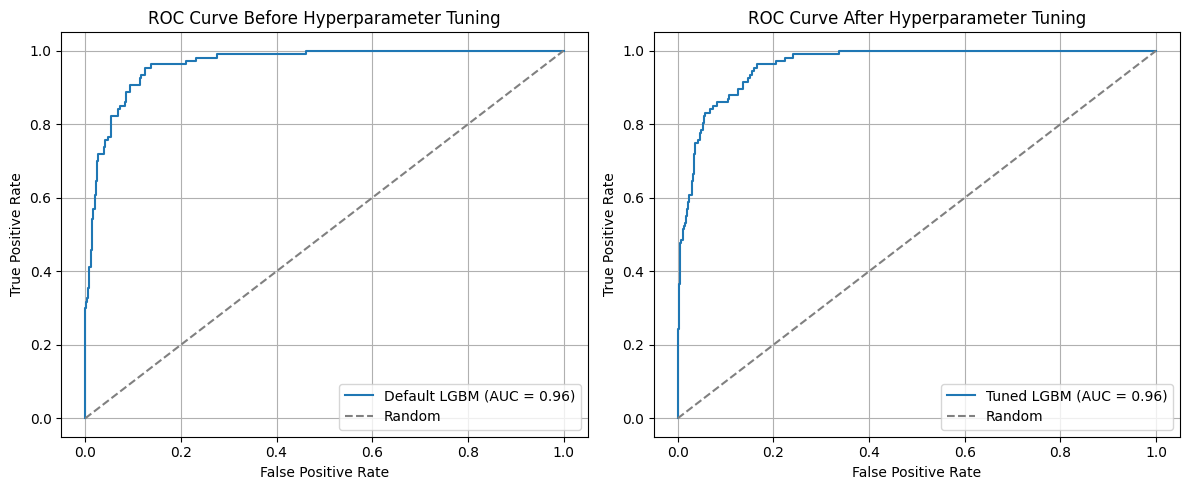

In [49]:
# Mendapatkan nilai prediksi probabilitas dari model default dan model setelah tuning
y_pred_proba_default = estimator.predict_proba(x_test)[:, 1]
y_pred_proba_tuned2 = tuned2.predict_proba(x_test)[:, 1]

# Mendapatkan nilai fpr (False Positive Rate) dan tpr (True Positive Rate) untuk model default
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)

# Mendapatkan nilai fpr (False Positive Rate) dan tpr (True Positive Rate) untuk model setelah tuning
fpr_tuned2, tpr_tuned2, _ = roc_curve(y_test, y_pred_proba_tuned2)
roc_auc_tuned2 = roc_auc_score(y_test, y_pred_proba_tuned2)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

# Plot untuk model default
plt.subplot(1, 2, 1)
plt.plot(fpr_default, tpr_default, label=f'Default LGBM (AUC = {roc_auc_default:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Before Hyperparameter Tuning')
plt.legend()
plt.grid(True)

# Plot untuk model setelah tuning
plt.subplot(1, 2, 2)
plt.plot(fpr_tuned2, tpr_tuned2, label=f'Tuned LGBM (AUC = {roc_auc_tuned2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After Hyperparameter Tuning')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

* Terlihat bahwa kedua model memiliki AUC yang sama, menunjukkan bahwa model default sudah cukup baik dalam memprediksi pelanggan churn.
* Untuk itu mari kita lanjut melihat classification report dari kedua model.

In [50]:
report_default = classification_report(y_test, y_pred_default)
report_tuned2 = classification_report(y_test, y_pred_tuned2)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned ke-2 LGBM : \n', report_tuned2)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       546
           1       0.72      0.82      0.77       107

    accuracy                           0.92       653
   macro avg       0.84      0.88      0.86       653
weighted avg       0.92      0.92      0.92       653

Classification Report Tuned ke-2 LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       546
           1       0.75      0.82      0.78       107

    accuracy                           0.92       653
   macro avg       0.86      0.88      0.87       653
weighted avg       0.93      0.92      0.93       653



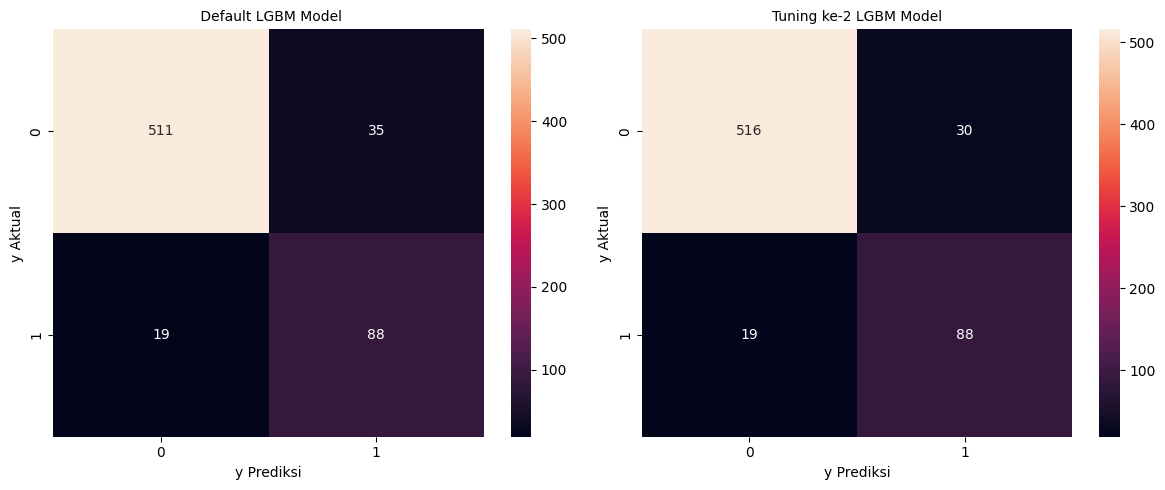

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f''' Default LGBM Model''', size=10)
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned2), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'''Tuning ke-2 LGBM Model''', size=10)
plt.tight_layout()
plt.show()

In [52]:
# LightGBM
print('LightGBM Hyperparameter')
print(lgbm_grid2.best_score_)
print(lgbm_grid2.best_params_)

LightGBM Hyperparameter
0.9454522283928014
{'model_lgbm__lambda_l1': 0.01, 'model_lgbm__lambda_l2': 0.01, 'model_lgbm__learning_rate': 0.1, 'model_lgbm__max_bin': 300, 'model_lgbm__max_depth': 21, 'model_lgbm__min_data_in_leaf': 20, 'model_lgbm__min_gain_to_split': 0, 'model_lgbm__num_iterations': 100, 'model_lgbm__num_leaves': 51}


Pada data diatas terdapat beberapa hal yang dapat diketahui, antara lain:
* Dari melakukan hyperparameter tuning, dapat dilihat selisih test LightGBM default dan tuned ke-2 tidak berbeda jauh yaitu selisih ROC_AUC 0.02. Nilai ROC_AUC pada parameter yang telah dituning adalah 0.96.
* Nilai hyperparameter tuning sudah dibandingkan dengan parameter default, dan didapatkan nilai yang cukup baik. Analisa yang dapat ditingkatkan lebih lanjut adalah **pemilihan parameter dengan nilai yang ditentukan sebagai referensi serta menguji hyperparameter lain**.
* Sehingga model yang akan digunakan adalah model yang menggunakan hyperparameter tuning ke-2, dengan metrik yang didapatkan pada kelas positif yaitu recall  0.82 dan precision 0.75, dengan f1 score 0.78. Pada kelas negatif didapat recall 0.95 dan precision 0.96, dengan f1 score 0.95. Analisa selanjutnya yang dapat ditingkatkan adalah **meningkatkan nilai recallnya pada kelas positif dengan melakukan tuning threshold pada ROC_AUC**.

In [53]:
# Model Akhir
best_model = lgbm_grid2.best_estimator_
Churn_model = best_model.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0

Found `num_iterations` in params. Will use it instead of argument


In [54]:
# Export model
best_model = lgbm_grid2.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing resampling, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0

Found `num_iterations` in params. Will use it instead of argument


[Pipeline] ........ (step 3 of 3) Processing model_lgbm, total=   0.1s


***

## 7. Explainable Model

***

Explainable model bertujuan untuk menjelaskan bagaimana peran model yang dibangun dalam menyelesaikan masalah.

In [55]:
cols = transformer_test.columns.tolist()


candidate_pre = best_model.named_steps['preprocess'].transform(df_model) # Data yang telah di preprocessing
# Preprocessing

model = best_model.named_steps['model_lgbm'] # Ambil model
features = cols

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                #  feature_dependence="independent",
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)

 98%|===================| 3185/3264 [00:26<00:00]       

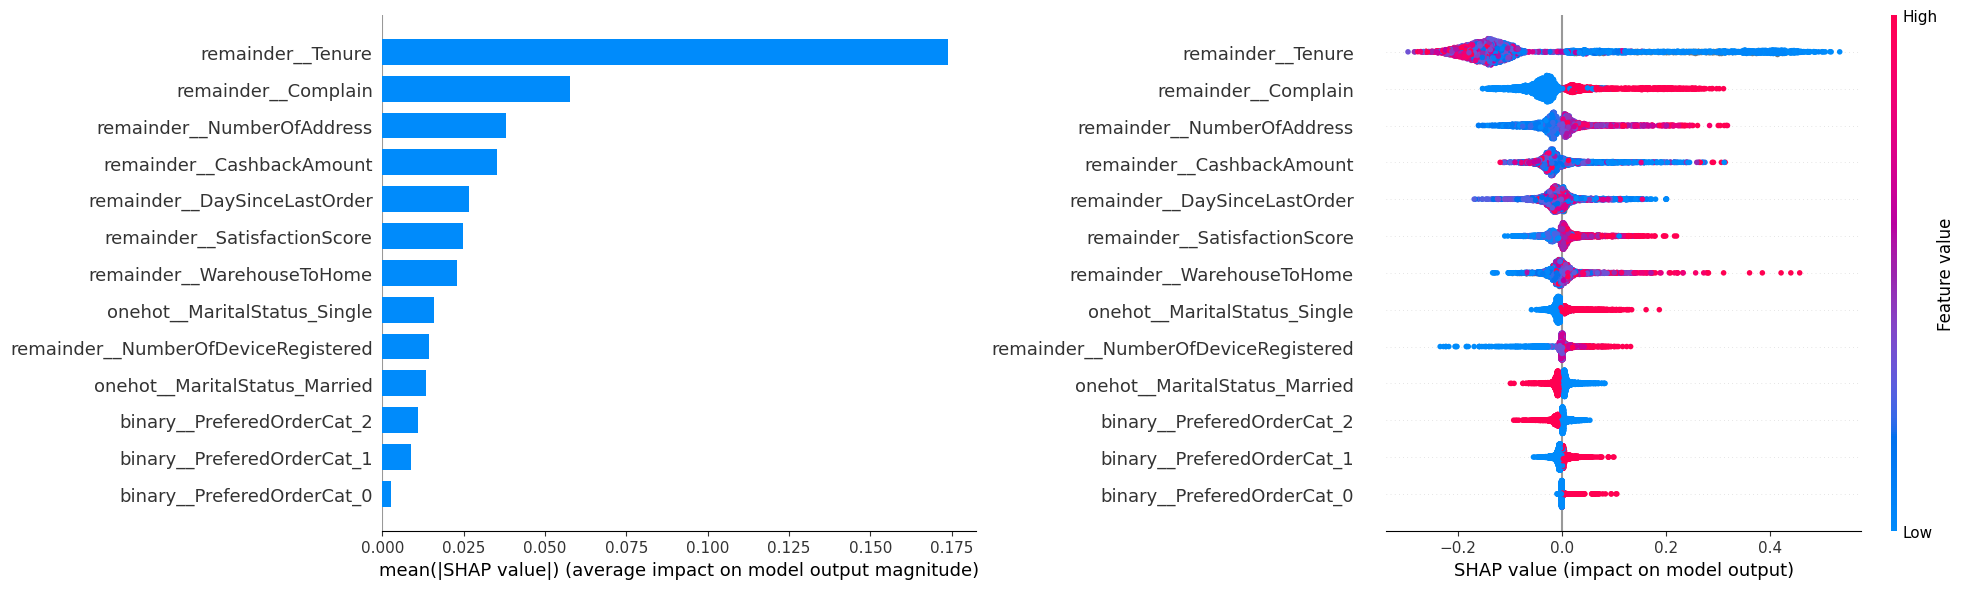

In [56]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='Feature Importance', plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='SHAP Feature', show=False, plot_size=None)
plt.show()

**Penjelasan SHAP Feature Importance dan SHAP Summary Plot**
1. Pada Model LGBM ini, fitur `Tenure` menjadi fitur yang paling penting terlihat fitur ini sangat berdampak pada customer churn.
2. Pada summary plot ini, secara umum terlihat bahwa semakin kecil `Tenure` artinya semakin baru customer tersebut join layanan E-Commerce ini, semakin berpengaruh fitur ini terhadap customer churn dan berlaku pula sebaliknya.
3. Fitur `Complain` juga termasuk fitur yang cukup penting
4. Semakin tinggi nilai complain (jika customer melakukan complain), maka dapat berdampak pada customer churn.
5. Fitur paling berpengaruh setelah `Tenure` dan `Complain` adalah `NumberOfAddress`.
6. Semakin tinggi nilai `NumberOfAddress`, maka dapat berdampak pada customer churn

In [57]:
# Load Dataset
customer = pd.read_csv(r'/content/data_ecommerce_customer_churn.csv')
customer.head()

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2                7.0          168.54      0  
3                NaN          230.27      0  
4                8.0          322.17      0

In [58]:
# Import Model
lgbm = pickle.load(open(r"/content/Model_final.sav", 'rb'))

In [59]:
pred_proba = lgbm.predict_proba(customer)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01


In [60]:
customer['Prediction(Prob->1)'] = pred_proba[:,1]
customer.sort_values(by='Prediction(Prob->1)', ascending=False).head(10)

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
487      1.0             17.0                         5        Mobile Phone   
2685     1.0             17.0                         5        Mobile Phone   
1128     1.0             16.0                         4        Mobile Phone   
860      1.0             16.0                         4        Mobile Phone   
3239     1.0             16.0                         4  Laptop & Accessory   
2356     0.0             30.0                         4  Laptop & Accessory   
3623     0.0              NaN                         4              Mobile   
2919     0.0              NaN                         4              Mobile   
65       1.0             31.0                         6        Mobile Phone   
2925     1.0             31.0                         6        Mobile Phone   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
487                   5        Single                8         1   
2685                  5        Single                8         1   
1128                  5        Single                4         1   
860                   5        Single                4         1   
3239                  5        Single                5         1   
2356                  4        Single                1         1   
3623                  5        Single                7         1   
2919                  5        Single                7         1   
65                    1        Single                3         1   
2925                  2        Single                3         1   

      DaySinceLastOrder  CashbackAmount  Churn  Prediction(Prob->1)  
487                 1.0          149.04      1             0.999388  
2685                1.0          149.04      1             0.999388  
1128                1.0          156.72      1             0.999235  
860                 1.0          156.72      1             0.999235  
3239                4.0          207.24      1             0.999054  
2356               10.0          145.99      1             0.998856  
3623                0.0          124.04      1             0.998787  
2919                0.0          124.04      1             0.998787  
65                  1.0          148.40      1             0.998596  
2925                1.0          148.40      1             0.998596

Dapat kita lihat 10 kandidat paling berpotensi melakukan Churn dilihat dari Probabilitas dia melakukan churn.
- 10 customer tersebut memiliki probabilitas 99.93 - 99.85% melakukan Churn.
- 10 customer tersebut memiliki `Tenure` 0 atau 1
- 10 customer tersebut 1 bulan terakhir bertransaksi dengan kategori `Mobile` yang sebenarnya satu kategori juga dengan `Mobile Phone` dan berikutnya ada  `Laptop & Accessory`.
- 10 Customer tersebut melakukan Complain
- 10 Customer tersebut baru saja melakukan order 0 sampai 10 hari yang lalu.

In [61]:
def shap_plot(j,model,S, columns):
    shap.initjs()
    values = model.predict(S, pred_contrib=True)
    y_pred = model.predict(S)[j]
    shap_values = values[:,:-1]
    base_values = values[:,-1]

    p = shap.force_plot(base_values[j], shap_values[j], S[j], columns)
    print(f"The prediction must predict this Customer: {('Potential' if y_pred == 1 else 'Not Potential')} to Churn")
    return p

In [62]:
prob_churn =  customer[customer['Churn'] == 1].sort_values('Prediction(Prob->1)', ascending=False)

In [63]:
# Customer paling berpotensi Churn ke 1
model = lgbm.named_steps['model_lgbm']
feature = lgbm.named_steps['preprocess'].transform(prob_churn)
columns = cols

shap_plot(0,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
The prediction must predict this Customer: Potential to Churn


In [64]:
# Customer paling berpotensi Churn ke 2
shap_plot(1,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
The prediction must predict this Customer: Potential to Churn


In [65]:
# Customer paling berpotensi Churn ke 10
shap_plot(2,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
The prediction must predict this Customer: Potential to Churn


In [66]:
# Customer paling berpotensi Churn ke 10
shap_plot(9,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
The prediction must predict this Customer: Potential to Churn


Customer ke 1, 2, 3 dan 10 yang paling berpotensi untuk churn memiliki karakteristik yang hampir sama, yaitu:
- Faktor yang paling mempengaruhi dia akan churn yaitu `Tenure`, `Complain`. Hal ini sama dengan analisa feature importance yang dilakukan di atas.

***
## 8. Conclusion & Recommendation
***

>### 8.1 **Conclusion**

In [67]:
print('Classification Report Tuned ke-2 LGBM : \n', report_tuned2)

Classification Report Tuned ke-2 LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       546
           1       0.75      0.82      0.78       107

    accuracy                           0.92       653
   macro avg       0.86      0.88      0.87       653
weighted avg       0.93      0.92      0.93       653



Tujuan utama dari proyek ini adalah membangun model prediktif yang dapat dengan akurat memprediksi churn pelanggan dengan menganalisis data historis pelanggan.

Tujuan dari project ini adalah untuk mengetahui prediksi seorang customer apakah akan melakukan churn atau tidak menggunakan jasa perusahaan e-commerce ini lagi. Berdasarkan business problem di atas, diketahui bahwa:

- model dapat mengetahui 95% pelanggan yang tidak churn dan 82% pelanggan yang churn (Berdasarkan Recall)
- Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 75%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar 10%(berdasarkan recall).

**Type 1 error** : False Positive  
Konsekuensi: [*operation loss*](https://www.investopedia.com/terms/o/operating-loss.asp#:~:text=An%20operating%20loss%20occurs%20when,profit%20before%20interest%20and%20taxes.) karena mengeluarkan biaya promo untuk pelanggan yang tidak tepat. biaya yang dikeluarkan sebesar 13,6 USD per customer bulan[source](https://firstpagesage.com/reports/average-cac-by-industry-b2c-edition/).
**Type 2 error** : False Negative  
Konsekuensi: *profit loss* karena customer *churn*. biaya yang dikeluarkan 5x lipat dari biaya promo ke customer 68 USD per customer per bulan.[source](https://www.superoffice.com/blog/reduce-customer-churn/)

**TANPA MENGGUNAKAN MACHINE LEARNING**

Perusahaan e-commerce tidak dapat mengetahui customer yang akan melakukan churn, sehingga perusahaan e-commerce harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan e-commerce harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya.

- Pengeluaran perusahaan untuk promosi ke semua customer 13,6 USD x 653 = 8.800 USD
- Promosi yang tepat sasaran pada orang yang churn: 68 USD X 107 = 7.276 USD

Sehingga diketahui bahwa perusahaan e-commerce mengeluarkan biaya yang tidak tepat sasaran (biaya promosi untuk customer yang loyal) sebesar: - 8.800 + 7276 USD = **- 1.524 USD**. Karena 653 customer adalah 1/5 dari total customer (3.265) maka -1.524 USD x 5 = **-7.620 USD**. Biaya tersebut seharusnya dapat ditekan jika menggunakan Machine Learning

**DENGAN MENGGUNAKAN MACHINE LEARNING**

Biaya yang tidak tepat sasaran di atas, dapat ditekan jika menggunakan Machine Learning, dengan memprediksi customer yang akan melakukan churn. Sehingga biaya promosi dapat difokuskan kepada customer yang akan melakukan churn, berdasarkan dari hasil prediksi dari Machine Learning.

- Pengeluaran perusahaan e-commerce promosi yang diprediksi churn (FP+TP): (30+88) x 13,6 USD = 1.604 USD
- Perusahaan e-commerce kehilangan customer karena tidak terprediksi akan churn (FN): 19 x 68 USD = 1.292 USD
- Promosi tepat sasaran (TP): 88 x 68 USD = 5.984 USD

Sehingga diketahui bahwa perusahaan e-commerce berhasil menghasilkan Revenue per bulan sebesar: - 1.604 - 1.292 + 5.984 = **3.115 USD**. Karena 653 customer adalah 1/5 dari total customer (3.265) maka 3.115 USD x 5 = **15.575 USD**

**PERBANDINGAN PENGGUNAAN MACHINE LEARNING**

- Sebelum pakai ML: perusahaan merugi **-7.620 USD** per bulan
- Setelah menggunakan ML: perusahaan berhasil menghasilkan profit **15.575 USD** per bulan

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma LightGBM setelah tuning dua kali berhasil menghasilkan profit **15.575** per bulan.


>### 8.2 **Recommendation**

**For Business:**

Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan.
1. Perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan agar dapat menghindari complain yang masuk.
1. Perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.
1. Perusahaan dapat memberikan penawaran berupa pengurangan biaya ongkos kirim kepada pelanggan yang memiliki jarak yang jauh dari gudang, bisa dengan melakukan kerja sama dengan pihak jasa pengantar (kurir) untuk meringankan cost dari perusahaan.
1. Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.
1. Perusahaan dapat memberikan penawaran khusus (Promo Cashback paket produk) kepada pelanggan yang memiliki masa tenure 0 - 1 bulan untuk mencegah potensi churn terhadap pelanggan baru..

**For Next Project & Model:**

Akurasi model machine learning yang dibuat terbatas pada range feature:
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99

1. Mengumpulkan lebih banyak data khususnya pada minority class.
1. Menambahkan parameter lain dalam hyperparameter tuning.
1. Menambahkan ID customer untuk memastikan dan mengetahui data yang duplikat.
1. Menambahkan feature lain seperti lama pengiriman produk, ketepatan waktu pengiriman, dan lain-lain.
1. Meminimalisir kesalahan penulisan data dan memastikan data yang diperoleh tidak ada yang kosong atau tidak terisi.
1. Mencoba ML algorithm diluar ML algorithm yang dipakai di project ini, dan mencoba dengan hyperparamater tuning kembali seperti SMOTENC dan lain sebagainya.
1. Mencoba dengan urutan pipeline yang berbeda.